# Paso 1: Análisis Exploratorio de los Datos

In [1]:
import pandas as pd

# Cargar datos desde el archivo CSV
import os
if os.path.exists("Historia_Climatica.csv"):
    df = pd.read_csv("Historia_Climatica.csv")
else:
    print("Error: Archivo no encontrado.")

#muestra los 5 primeros datos del csv
print(df.head())

    Fecha_Hora  Ciudad  Temperatura_C  Humedad_%  Vel_Viento_mps  Presion_hPa  \
0  1/1/24 0:00  Madrid             27         79             184         9935   
1  1/1/24 1:00  Madrid             23         58              52        10125   
2  1/1/24 2:00  Madrid             35         91             196         9929   
3  1/1/24 3:00  Madrid             11         96             114        10197   
4  1/1/24 4:00  Madrid             34         62             147        10033   

  Estado_Clima  
0      Nublado  
1      Nublado  
2      Nublado  
3       Nevado  
4   Tormentoso  


In [2]:
# Estadísticas básicas
df.describe()

,Temperatura_C,Humedad_%,Vel_Viento_mps,Presion_hPa
count,1008.000000,1008.000000,1008.000000,1008.000000
mean,143.740079,68.867063,101.334325,10124.824405
std,144.665412,17.391462,55.115067,131.477668
min,-100.000000,40.000000,5.000000,9900.000000
25%,18.750000,54.000000,55.000000,10012.750000
50%,139.000000,69.000000,101.000000,10122.500000
75%,268.250000,84.000000,147.000000,10242.000000
max,400.000000,99.000000,200.000000,10350.000000


### Analizando los datos en graficos

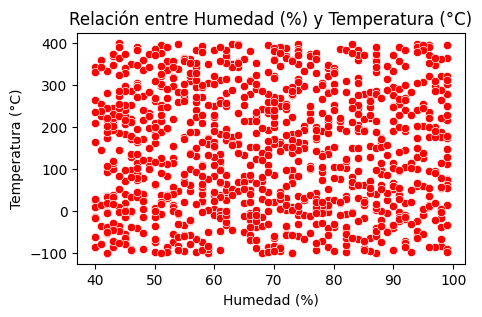

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Relación entre Humedad (%) y Temperatura (°C)
plt.figure(figsize=(5, 3))
sns.scatterplot(data=df, x='Humedad_%', y='Temperatura_C', color='red')
plt.title('Relación entre Humedad (%) y Temperatura (°C)')
plt.xlabel('Humedad (%)')
plt.ylabel('Temperatura (°C)')
plt.show()

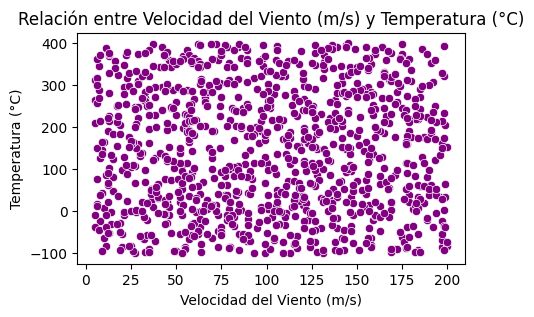

In [62]:
# Relación entre Velocidad del Viento (m/s) y Temperatura (°C)
plt.figure(figsize=(5, 3))
sns.scatterplot(data=df, x='Vel_Viento_mps', y='Temperatura_C', color='purple')
plt.title('Relación entre Velocidad del Viento (m/s) y Temperatura (°C)')
plt.xlabel('Velocidad del Viento (m/s)')
plt.ylabel('Temperatura (°C)')
plt.show()

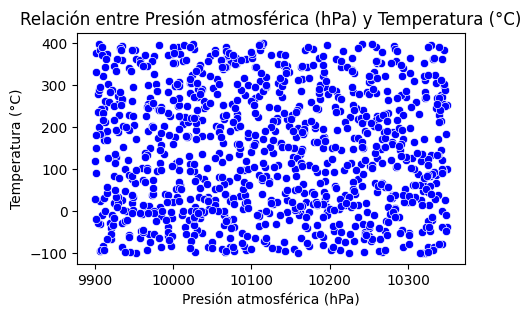

In [63]:
# Relación entre Presión atmosférica (hPa) y Temperatura (°C)
plt.figure(figsize=(5, 3))
sns.scatterplot(data=df, x='Presion_hPa', y='Temperatura_C', color='blue')
plt.title('Relación entre Presión atmosférica (hPa) y Temperatura (°C)')
plt.xlabel('Presión atmosférica (hPa)')
plt.ylabel('Temperatura (°C)')
plt.show()

# Paso 2: Preparación de los Datos

In [8]:
# Normalizacion de los datos nulos
# La normalización convierte los valores a una distribución con media 0 y desviación estándar 1.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Temperatura_C', 'Humedad_%', 'Vel_Viento_mps']] = scaler.fit_transform(df[['Temperatura_C', 'Humedad_%', 'Vel_Viento_mps']])

#verificar si hay valores nulos
df.fillna(df.select_dtypes(include=['number']).mean(), inplace=True) # Reemplazar nulos con la media

# Paso 3: Extracción de atributos de la fecha

In [66]:
# Convertir la columna 'Fecha_Hora' a formato datetime
df['Fecha_Hora'] = pd.to_datetime(df['Fecha_Hora'])

# Extraer el atributo Hora, Mes, Día y Año (Separar)
df['Hora'] = df['Fecha_Hora'].dt.hour
df['Mes'] = df['Fecha_Hora'].dt.month
df['Día'] = df['Fecha_Hora'].dt.day
df['Año'] = df['Fecha_Hora'].dt.year

print(df[['Fecha_Hora', 'Hora', 'Mes', 'Día', 'Año']].head())

           Fecha_Hora  Hora  Mes  Día   Año
0 2024-01-01 00:00:00     0    1    1  2024
1 2024-01-01 01:00:00     1    1    1  2024
2 2024-01-01 02:00:00     2    1    1  2024
3 2024-01-01 03:00:00     3    1    1  2024
4 2024-01-01 04:00:00     4    1    1  2024


# Paso 4: Selección de variables

In [68]:
# Selección de las variables independientes
X = df[['Humedad_%', 'Vel_Viento_mps', 'Presion_hPa', 'Hora', 'Mes', 'Día', 'Año']]

# Variable dependiente
y = df['Temperatura_C']

print(X.head())

   Humedad_%  Vel_Viento_mps  Presion_hPa  Hora  Mes  Día   Año
0   0.582928        1.500619         9935     0    1    1  2024
1  -0.625161       -0.895559        10125     1    1    1  2024
2   1.273264        1.718453         9929     2    1    1  2024
3   1.560904        0.229918        10197     3    1    1  2024
4  -0.395049        0.828963        10033     4    1    1  2024


# Paso 5: Desarrollo del modelo

In [69]:
from sklearn.model_selection import train_test_split

# Variables independientes (X) y dependiente (y)
X = df[['Humedad_%', 'Vel_Viento_mps', 'Presion_hPa', 'Hora', 'Mes', 'Día', 'Año']]
y = df['Temperatura_C']

# Dividir el conjunto de datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

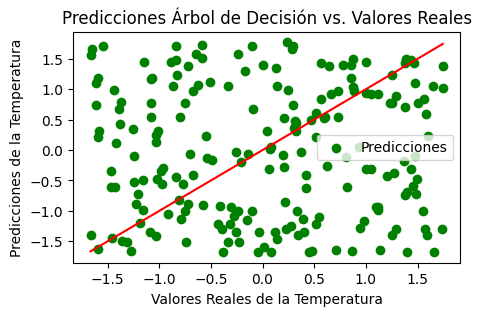

In [70]:
from sklearn.tree import DecisionTreeRegressor

# Inicializar el modelo de árbol de decisión
modelo_arbol = DecisionTreeRegressor(random_state=42)

# Entrenar el modelo con el conjunto de entrenamiento
modelo_arbol.fit(X_train, y_train)

# Realizar predicciones con el conjunto de prueba
y_pred_arbol = modelo_arbol.predict(X_test)

# Grafico de las predicciones frente a los valores reales para el modelo (árbol de decisión)
plt.figure(figsize=(5, 3))
plt.scatter(y_test, y_pred_arbol, color='green', label="Predicciones")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='-')

plt.title("Predicciones Árbol de Decisión vs. Valores Reales")
plt.xlabel("Valores Reales de la Temperatura")
plt.ylabel("Predicciones de la Temperatura")
plt.legend()
plt.show()


# Paso 6: Reflexion sobre el modelo

In [71]:
from sklearn.tree import plot_tree
import numpy as np

# Profundidad del árbol
max_depth = modelo_arbol.get_depth()
num_leaves = modelo_arbol.get_n_leaves()
print(f"Profundidad del árbol: {max_depth}")
print(f"Número de hojas terminales: {num_leaves}")

# Contar cuantas veces se uso cada variable en las divisiones
feature_importances = modelo_arbol.feature_importances_
features = X.columns

# Crear un DataFrame para ver la importancia de cada variable
importances_df = pd.DataFrame({'Variable': features, 'Importancia': feature_importances})
importances_df = importances_df.sort_values(by='Importancia', ascending=False)
print("\nImportancia de las variables en las divisiones:")
print(importances_df)

#Evaluar si el árbol es demasiado profundo
if max_depth > 10:
    print("\n El árbol es muy profundo, puede estar sobreajustando los datos.")
elif max_depth < 3:
    print("\n El árbol es poco profundo, puede estar subajustando y no capturando bien los patrones.")
else:
    print("\n La profundidad del árbol parece adecuada.")

#Grafico del árbol de decisión
#plt.figure(figsize=(15, 7))
#plot_tree(modelo_arbol, feature_names=X.columns, filled=True, fontsize=8)
#plt.title("Estructura del Árbol de Decisión")
#plt.show()

Profundidad del árbol: 29
Número de hojas terminales: 791

Importancia de las variables en las divisiones:
         Variable  Importancia
2     Presion_hPa     0.255561
1  Vel_Viento_mps     0.221774
5             Día     0.189599
0       Humedad_%     0.157678
3            Hora     0.147280
4             Mes     0.028108
6             Año     0.000000

 El árbol es muy profundo, puede estar sobreajustando los datos.


# Paso 7: Evaluación del modelo

In [72]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calcular MAE y R2
mae = mean_absolute_error(y_test, y_pred_arbol)
r2 = r2_score(y_test, y_pred_arbol)
print(f"Error Absoluto Medio (MAE): {mae:.2f}")
print(f"Coeficiente de Determinación (R²): {r2:.2f}")

# Evaluar si el modelo cumple con los criterios esperados
if mae < 4.5:
    print("El MAE es aceptable, el modelo tiene buena precisión en las predicciones.")
else:
    print("El MAE es alto, el modelo puede tener errores en sus predicciones.")

if r2 > 0.65:
    print("El R2 es bueno, el modelo explica bien la variabilidad de la temperatura.")
else:
    print("El R2 es bajo, el modelo no expresa bien la variabilidad de los datos.")


Error Absoluto Medio (MAE): 1.15
Coeficiente de Determinación (R²): -1.14
El MAE es aceptable, el modelo tiene buena precisión en las predicciones.
El R2 es bajo, el modelo no expresa bien la variabilidad de los datos.


# Paso 8: Reflexión final

#### Profundidad del árbol y número de hojas terminales:
La profundidad del árbol (29) es alto, lo que sugiere que el modelo ha dividido los datos en muchas ramas, lo que puede haber llevado a un sobreajuste.
El número de hojas terminales (791) es alto, lo que indica que el árbol tiene muchas divisiones, lo que refuerza la posibilidad de sobreajuste.

#### Importancia de las variables:
- Presión atmosférica (Presion_hPa) es la variable más importante en las divisiones (0.255561), por lo cual la presión atmosférica podría tener un impacto significativo en la temperatura.
- Velocidad del viento (Vel_Viento_mps) también tiene una alta importancia (0.221774), lo que sugiere que el viento podría influir en las temperaturas, probablemente enfriando o calentando el ambiente.
- Día tiene una importancia medianamente alta (0.189599), lo que implica que la variabilidad diaria afecta las predicciones de temperatura.
- Mes y Año tienen importancias menores (0.028108 y 0.000000), lo que indica que estas variables no contribuyen significativamente.

#### Error Absoluto Medio (MAE):
El MAE de 1.15 es bajo, lo que significa que, a pesar del posible sobreajuste, las predicciones siguen siendo bastante precisas.

#### Coeficiente de Determinación (R²):
El R2 de -1.14 es negativo, es una señal de que el modelo está sobreajustado y no está generalizando bien los datos. Y es resultado de un árbol muy profundo con muchas ramas.

## Reflexión sobre el modelo:
1. El sobreajuste parece ser el principal problema, lo que se debe a la profundidad excesiva del árbol.
2. La importancia de las variables muestra que algunas variables, como la presión atmosférica y la velocidad del viento, tienen un impacto relevante en la predicción de la temperatura, mientras que otras, como el año, no son tan significativas.
3. Aunque el MAE es bajo, el R2 negativo indica que el modelo necesita ser ajustado.